In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mnist_df = pd.read_csv('digits.csv')
mnist = pd.DataFrame(columns = ['image','label'])
for i in range(0,1796,1):
    image_arr = mnist_df.iloc[i,:64]
    mnist.loc[i] = [image_arr,mnist_df.iloc[i,64]]

In [12]:
image_list = []
image_label = []
for i in range(0,1796,1):
    image_list.append(np.array(mnist.iloc[i,0]))
    image_label.append(mnist.iloc[i,1])
new_dict = {"Image":image_list,"Label":image_label}

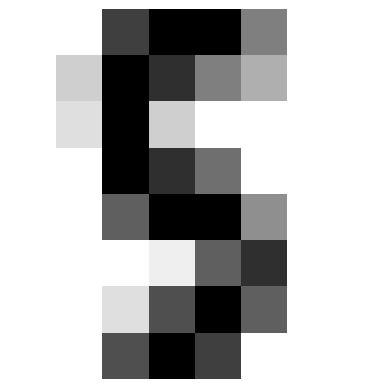

5


In [14]:
image = new_dict["Image"][101].reshape(8,8)
plt.imshow(image,cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
print(new_dict["Label"][101])

In [15]:
image_arr = np.array(new_dict['Image'])
image_arr.shape
label_arr = np.array(new_dict['Label'])
label_arr.shape

(1796,)

In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(image_arr, test_size=0.2, random_state=42)
train_label, test_label = train_test_split(label_arr, test_size=0.2, random_state=42)

In [17]:
y_train_5 = (train_label == 5)
y_test_5 = (test_label == 5)

In [18]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(train_set, y_train_5)

SGDClassifier(random_state=42)

array([[ 0],
       [ 0],
       [ 8],
       [15],
       [12],
       [ 4],
       [ 0],
       [ 0],
       [ 0],
       [ 5],
       [14],
       [ 4],
       [11],
       [ 7],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [14],
       [ 3],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 2],
       [15],
       [14],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 8],
       [13],
       [11],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [13],
       [ 5],
       [ 0],
       [ 0],
       [ 0],
       [12],
       [ 2],
       [ 3],
       [12],
       [ 7],
       [ 0],
       [ 0],
       [ 0],
       [13],
       [16],
       [15],
       [ 8],
       [ 0],
       [ 0]], dtype=int64)

In [65]:
sgd_clf.predict(test_set[24].reshape(1,64))

array([ True])

In [66]:
test_label[24]

5

In [67]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, train_set, y_train_5, cv = 3, scoring = "accuracy")

array([0.99164927, 0.98538622, 0.9916318 ])

In [68]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, train_set, y_train_5, cv = 3)

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[1285,    8],
       [   7,  136]], dtype=int64)

In [71]:
from sklearn.metrics import precision_score, recall_score,f1_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))
print(f1_score(y_train_5, y_train_pred))

0.9444444444444444
0.951048951048951
0.9477351916376306


In [72]:
y_scores = cross_val_predict(sgd_clf, train_set, y_train_5, cv = 3, method = "decision_function")

In [75]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

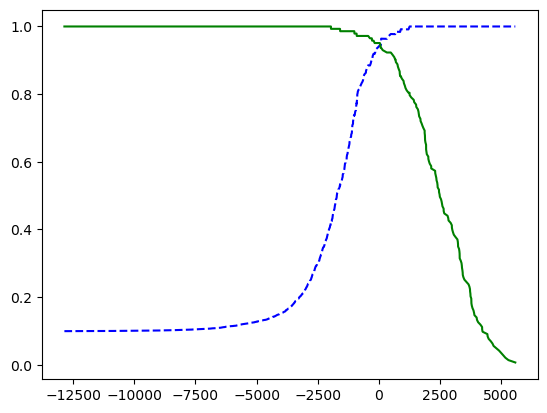

In [76]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 [...] # highlight the threshold, add the legend, axis label and grid
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


In [77]:
sgd_clf.fit(train_set,train_label)

SGDClassifier(random_state=42)

In [81]:
sgd_clf.predict([test_set[4]])

array([2], dtype=int64)

In [82]:
test_label[4]

2

In [83]:
cross_val_score(sgd_clf, train_set,train_label, cv = 3, scoring = "accuracy")

array([0.94572025, 0.94572025, 0.92887029])

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_set.astype(float))
cross_val_score(sgd_clf, X_train_scaled, train_label, cv = 3 , scoring = "accuracy")

array([0.94780793, 0.93110647, 0.94560669])

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, train_label)

KNeighborsClassifier()

In [87]:
knn_clf.predict([X_train_scaled[2]])

array([0], dtype=int64)

In [88]:
train_label[2]

0

In [89]:
cross_val_score(knn_clf, X_train_scaled, train_label, cv = 3, scoring = "accuracy")

array([0.97286013, 0.96450939, 0.98535565])

In [90]:
y_predict = cross_val_predict(knn_clf, X_train_scaled, train_label, cv = 3)

In [94]:
print(precision_score(train_label,y_predict,average = None))
print(recall_score(train_label,y_predict,average = None))

[1.         0.92993631 0.98601399 0.97333333 0.98611111 0.98591549
 0.99264706 0.95333333 0.95744681 0.984     ]
[1.         1.         0.99295775 0.97333333 0.96598639 0.97902098
 0.99264706 0.99305556 0.93103448 0.91111111]


In [97]:
y_scores = cross_val_predict(sgd_clf, X_train_scaled,train_label, cv=3,
 method="decision_function")
y_scores

array([[ -36.52965209, -271.88123592, -308.84433063, ..., -492.49935702,
         -56.43959865, -391.44357954],
       [-182.61456201, -181.09445283,   23.40990397, ..., -335.97458129,
        -124.04862715, -257.72486901],
       [ 125.0049132 , -222.53603376, -385.45388321, ..., -295.85469953,
        -155.21988497, -214.37443301],
       ...,
       [-398.22703576,   -8.24519029, -165.39986224, ..., -147.04661231,
         -16.62298564, -250.49815138],
       [-327.93325062, -359.90244794, -205.47209026, ..., -324.92211369,
         -38.89949229, -107.2694137 ],
       [-148.3492826 , -315.73194676, -482.05521361, ..., -124.28102439,
        -122.8121497 , -268.54972079]])

In [99]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_label[0], y_scores[0])

InvalidParameterError: The 'y_true' parameter of roc_curve must be an array-like. Got 6 instead.

In [100]:
train_set

array([[ 0,  0,  3, ..., 13,  4,  0],
       [ 0,  0,  2, ...,  8,  4,  0],
       [ 0,  0,  0, ...,  6,  0,  0],
       ...,
       [ 0,  0,  2, ...,  2,  0,  0],
       [ 0,  0,  8, ..., 12,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [102]:
from scipy.ndimage.interpolation import shift
shift(train_set[0], [2,1], cval =0)

C:\Users\USER\AppData\Local\Temp\ipykernel_19860\2254894071.py:1: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import shift


RuntimeError: sequence argument must have length equal to input rank